[Link na zadatke](http://www.fer.unizg.hr/_download/repository/Zadatak_za_5._zadacu.pdf)

In [1]:
%%capture
%run Lab01.ipynb

In [2]:
import matplotlib.pyplot as plt
import logging

In [3]:
class SingularMatrixException(Exception):
    def __init__(self, message):
        super(SingularMatrixException, self).__init__(message)

In [4]:
class Matrix(Matrix):
    def is_singular(self, tolerance=1e-6):
        return abs(np.linalg.det(self.elements)) <= tolerance
        
    def inverse(self):
        if self.is_singular():
            raise SingularMatrixException("Called inverse, but matrix is singular.")
            
        lhs = self
        rhs = Matrix.identity(self.width)
        L, U, P = lup(lhs)
        rhs_prime = permute_rows(rhs, P, rhs.height)
        
        sol = []
        for row in rhs_prime.T:
            fs = forward_sub(L, Matrix(row).T)
            bs = backward_sub(U, fs)
            sol.append([e[0] for e in bs.elements])
            
        return Matrix(sol).T
    
    @staticmethod
    def identity(rank):
        return Matrix(np.identity(rank))
    
    @staticmethod
    def zeros(shape):
        return Matrix(np.zeros(shape))

In [5]:
def assert_square_matrix(matrix):
    if matrix.width != matrix.height:
        raise InvalidDimensionException(matrix)
    return matrix.height

In [6]:
def do_nothing(*args):
    pass

def log_every_nth(n):
    def accept_logger(logger, level):
        def accept_values(i, value):
            if i % n == 0:
                logger.log(level, value)
        return accept_values
    return accept_logger

In [7]:
def log(method_accepting_logger_and_level, level=logging.DEBUG):
    def decorator(function):
        logger = logging.getLogger(function.__name__)
        def wrapper(*args, **kwargs):
            kwargs['logger_callable'] = \
                method_accepting_logger_and_level(logger, level)
            return function(*args, **kwargs)
        return wrapper
    return decorator

In [8]:
@log(log_every_nth(10), level=logging.DEBUG)
def trapezoid(A, B, x0, T, step, logger_callable=do_nothing):
    rank = assert_square_matrix(A)
    h = T / step
    inv = (Matrix.identity(rank) - A * h / 2).inverse()
    R = inv * (Matrix.identity(rank) + A * h / 2)
    S = inv * B
    y = [Matrix(x0)]
    for i in range(1, step):
        y.append(R * y[i - 1] + S)
        logger_callable(i, "({}, {})".format(*y[-1]))
        
    return np.linspace(0, T, step), y

In [9]:
@log(log_every_nth(10), level=logging.DEBUG)
def runge_kutta(A, B, x0, T, step, logger_callable=do_nothing):
    rank = assert_square_matrix(A)
    h = T / step
    y = [Matrix(x0)]
    for i in range(1, step):
        m1 = A * y[i - 1] + B
        m2 = A * (y[i - 1] + h / 2 * m1) + B
        m3 = A * (y[i - 1] + h / 2 * m2) + B
        m4 = A * (y[i - 1] + h * m3) + B
        y.append(y[i - 1] + h / 6 * (m1 + 2 * m2 + 2 * m3 + m4))
        
        logger_callable(i, "({}, {})".format(*y[-1]))
    return np.linspace(0, T, step), y

# Zadatak 1.
Inverz (singularne) matrice.

In [10]:
m = Matrix(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]])

try:
    m.inverse()
except Exception as e:
    print(e.args[0])

Called inverse, but matrix is singular.


# Zadatak 2.
Inverz matrice.

In [11]:
m = Matrix(
    [[4, -5, -2],
     [5, -6, -2],
     [-8, 9, 3]])
m.inverse()

-0.0 -3.0 -2.0
1.0 -4.0 -2.0
-3.0 4.0 1.0

# Zadatak 3.

In [12]:
A = Matrix([[0, 1], 
            [-1, 0]])
B = Matrix.zeros([2]).T
x0 = Matrix([0, 2]).T
T, step = 5, 50

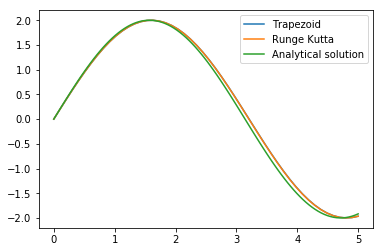

In [13]:
# trapezoid
xt, yt = trapezoid(A, B, x0, T, step)
plt.plot(xt, [ i.elements[0] for i in yt ], label="Trapezoid")

# runge-kutta
xrk, yrk = runge_kutta(A, B, x0, T, step)
plt.plot(xrk, [ i.elements[0] for i in yrk ], label="Runge Kutta")

# analytical
xa = np.linspace(0, T, 100)
ya = x0[0] * np.cos(xa) + x0[1] * np.sin(xa)
plt.plot(xa, ya, label="Analytical solution")

_ = plt.legend()

# Zadatak 4. 

In [14]:
A = Matrix([[0, 1],
            [-200, -102]])
B = Matrix.zeros([2]).T
x0 = Matrix([1, -2]).T

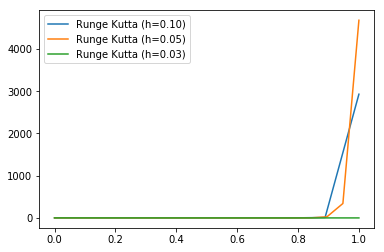

In [15]:
T, step = 1, 10
xrk, yrk = runge_kutta(A, B, x0, T, step)
plt.plot(xrk, [ i.elements[0] for i in yrk ], 
         label="Runge Kutta (h=%.2f)" % (T / step))
_ = plt.legend()

T, step = 1, 20
xrk, yrk = runge_kutta(A, B, x0, T, step)
plt.plot(xrk, [ i.elements[0] for i in yrk ], 
         label="Runge Kutta (h=%.2f)" % (T / step))
_ = plt.legend()

T, step = 1, 30
xrk, yrk = runge_kutta(A, B, x0, T, step)
plt.plot(xrk, [ i.elements[0] for i in yrk ], 
         label="Runge Kutta (h=%.2f)" % (T / step))
_ = plt.legend()

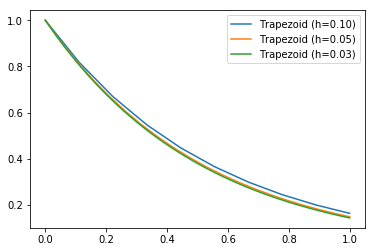

In [16]:
T, step = 1, 10
xt, yt = trapezoid(A, B, x0, T, step)
plt.plot(xt, [ i.elements[0] for i in yt ], 
         label="Trapezoid (h=%.2f)" % (T / step))
_ = plt.legend()

T, step = 1, 20
xt, yt = trapezoid(A, B, x0, T, step)
plt.plot(xt, [ i.elements[0] for i in yt ], 
         label="Trapezoid (h=%.2f)" % (T / step))
_ = plt.legend()

T, step = 1, 30
xt, yt = trapezoid(A, B, x0, T, step)
plt.plot(xt, [ i.elements[0] for i in yt ], 
         label="Trapezoid (h=%.2f)" % (T / step))
_ = plt.legend()